In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
table = pd.read_csv('Punjab.csv', index_col='Sl. No.')
table.columns = ['year', 'area', 'population', 'crops_area', 'crops_value', 'houses', 'houses_value', 
                  'cattle','life_lost', 'public_utilities', 'total_damage']

In [3]:
table

,year,area,population,crops_area,crops_value,houses,houses_value,cattle,life_lost,public_utilities,total_damage
Sl. No.,,,,,,,,,,,
1.0,1953,Neg,Neg,Neg,0.02,181,0.01,6,3,Nil,0.03
2.0,1954,0.01,0,0.01,0.17,983,0.04,48,Nil,Nil,0.21
3.0,1955,0.92,Nil,0.92,15.98,627100,15.08,56100,477,Nil,31.06
4.0,1956,0.06,Nil,0.06,0.8,8014,0.18,567,8,Nil,0.98
5.0,1957,0.08,Nil,0.08,1.61,5100,0.03,108,288,Nil,1.64
...,...,...,...,...,...,...,...,...,...,...,...
64.0,2016,0.001,0,0.001,1.14,20,0.025,0,13,0.495,1.66
NaN,TOTAL,17.819,29.846,14.314,1777.617,2905604,658.979,176905,3129,1762.376,4198.972
NaN,Average,0.343,0.649,0.27,31.186,50097,11.561,3159,56,41.961,71.169


In [4]:
t_table = pd.DataFrame(table.loc[1.0:64.0])
for column in t_table:
    t_table[column] = pd.to_numeric(t_table[column], errors='coerce')
t_table = t_table.replace(np.nan, 0.0, regex=True)

In [5]:
t_table

,year,area,population,crops_area,crops_value,houses,houses_value,cattle,life_lost,public_utilities,total_damage
Sl. No.,,,,,,,,,,,
1.0,1953,0.000,0.000,0.000,0.02,181.0,0.010,6.0,3.0,0.000,0.030
2.0,1954,0.010,0.000,0.010,0.17,983.0,0.040,48.0,0.0,0.000,0.210
3.0,1955,0.920,0.000,0.920,15.98,627100.0,15.080,56100.0,477.0,0.000,31.060
4.0,1956,0.060,0.000,0.060,0.80,8014.0,0.180,567.0,8.0,0.000,0.980
5.0,1957,0.080,0.000,0.080,1.61,5100.0,0.030,108.0,288.0,0.000,1.640
...,...,...,...,...,...,...,...,...,...,...,...
60.0,2012,0.003,0.000,0.003,0.00,149.0,0.131,3034.0,8.0,0.000,0.131
61.0,2013,0.164,0.009,0.110,136.46,36258.0,26.510,954.0,44.0,169.000,331.970
62.0,2014,0.043,0.400,0.043,49.71,36445.0,21.590,127.0,44.0,49.000,120.300


In [6]:
years = t_table['year'].values

# Start Plotting

## All Data Visualization

In [7]:
%matplotlib inline
plt.rcParams.update({'font.size': 16})

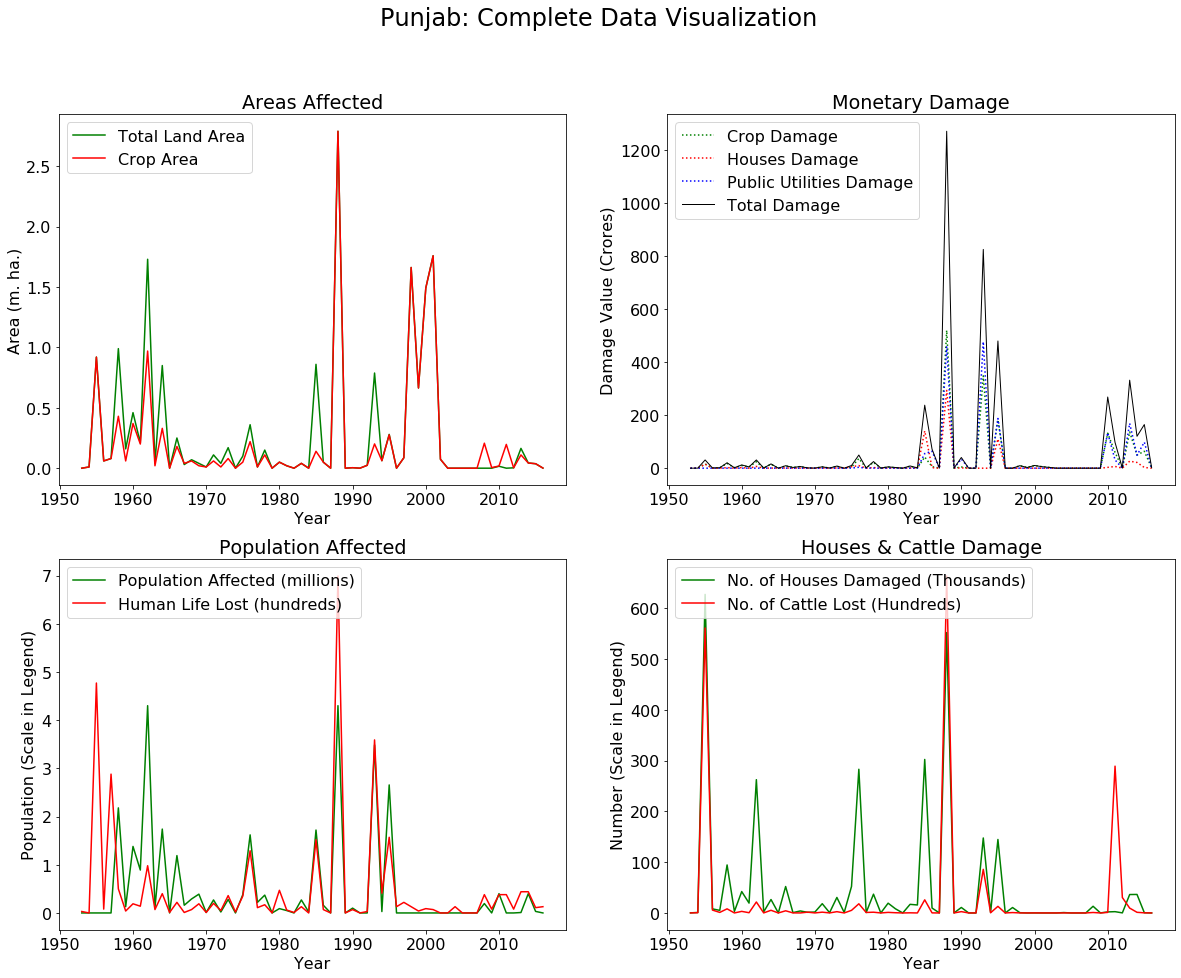

In [8]:
fig1 = plt.figure(figsize=(20,15))
fig1.suptitle('Punjab: Complete Data Visualization', fontsize = 24)

ax1 = fig1.add_subplot(2, 2, 1)
ax2 = fig1.add_subplot(2, 2, 2)
ax3 = fig1.add_subplot(2, 2, 3)
ax4 = fig1.add_subplot(2, 2, 4)

ax1.set_title('Areas Affected')
ax1.set_xlabel('Year')
ax1.set_ylabel('Area (m. ha.)')
ax1.plot(years, t_table['area'].values, label="Total Land Area", c='green');
ax1.plot(years, t_table['crops_area'].values, label="Crop Area", c='red');
ax1.legend(loc='upper left');

ax2.set_title('Monetary Damage')
ax2.set_xlabel('Year')
ax2.set_ylabel('Damage Value (Crores)')
ax2.plot(years, t_table['crops_value'].values, linestyle="dotted", label="Crop Damage", c='green');
ax2.plot(years, t_table['houses_value'].values, linestyle="dotted", label="Houses Damage", c='red');
ax2.plot(years, t_table['public_utilities'].values, linestyle="dotted", label="Public Utilities Damage", c='blue');
ax2.plot(years, t_table['total_damage'].values, label="Total Damage", c='black', linewidth=1);
ax2.legend(loc='upper left');

ax3.set_title('Population Affected')
ax3.set_xlabel('Year')
ax3.set_ylabel('Population (Scale in Legend)')
ax3.plot(years, t_table['population'].values, label="Population Affected (millions)", c='green');
ax3.plot(years, t_table['life_lost'].div(100).values, label="Human Life Lost (hundreds)", c='red');
ax3.legend(loc='upper left');

ax4.set_title('Houses & Cattle Damage')
ax4.set_xlabel('Year')
ax4.set_ylabel('Number (Scale in Legend)')
ax4.plot(years, t_table['houses'].div(1000).values, label="No. of Houses Damaged (Thousands)", c='green');
ax4.plot(years, t_table['cattle'].div(100).values, label="No. of Cattle Lost (Hundreds)", c='red');
ax4.legend(loc='upper left');

plt.savefig("Punjab_1.png")
plt.show()

## Monetary Damage Analysis

In [9]:
monetary_labels = 'crops', 'houses', 'public utilities'

total_damages = table[table['year'] == 'TOTAL'].iloc[0]
total_monetary_damages = [float(total_damages['crops_value']), 
                          float(total_damages['houses_value']), 
                          float(total_damages['public_utilities'])]

average_damages = table[table['year'] == 'Average'].iloc[0]
average_monetary_damages = [float(average_damages['crops_value']), 
                          float(average_damages['houses_value']), 
                          float(average_damages['public_utilities'])]

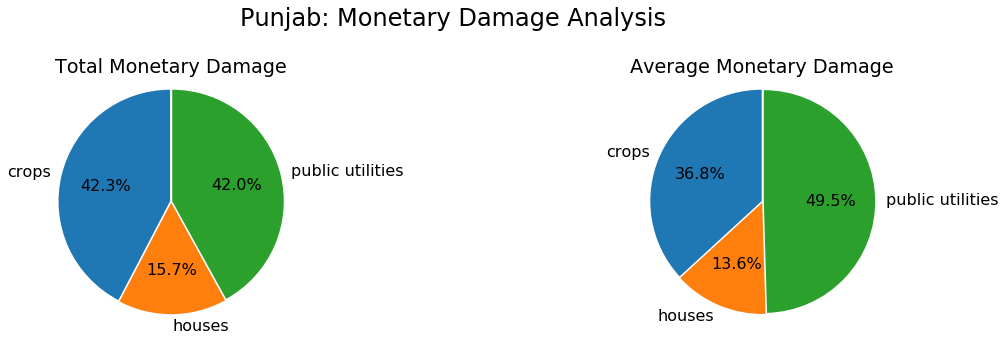

In [10]:
fig2 = plt.figure(figsize=(15,10))
fig2.suptitle('Punjab: Monetary Damage Analysis', fontsize = 24)
explode = (0.01, 0.01, 0.01)

ax1_2 = fig2.add_subplot(2, 3, 1)
ax2_2 = fig2.add_subplot(2, 3, 3)

ax1_2.set_title('Total Monetary Damage')
ax1_2.pie(total_monetary_damages, explode=explode, labels = monetary_labels, autopct='%1.1f%%', textprops={'fontsize': 16}, startangle=90);
ax1_2.axis('equal');

ax2_2.set_title('Average Monetary Damage')
ax2_2.pie(average_monetary_damages, explode=explode, labels = monetary_labels, autopct='%1.1f%%', textprops={'fontsize': 16}, startangle=90);
ax2_2.axis('equal');

plt.savefig("Punjab_2.png")
plt.show()

## Area Damage Trends

In [11]:
area_affected = t_table['area'].values

changes = []
for i in range(1, area_affected.size):
    changes.append(area_affected[i] - area_affected[i-1])

In [12]:
crop_area = t_table['crops_area'].values

percentages = []
for i in range(0, crop_area.size):
    if(area_affected[i] == 0.0):
        percentages.append(0)
    else:
        perc = round((crop_area[i]/area_affected[i])*100, 2)
        if(perc > 100):
            perc = 100
        percentages.append(perc)

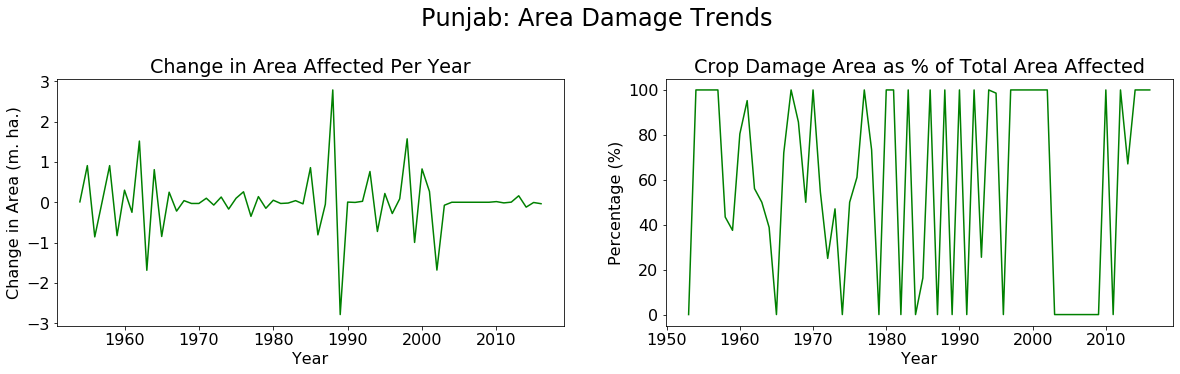

In [13]:
fig3 = plt.figure(figsize=(20,10))
fig3.suptitle('Punjab: Area Damage Trends', fontsize = 24)

ax1_3 = fig3.add_subplot(2, 2, 1)
ax2_3 = fig3.add_subplot(2, 2, 2)

ax1_3.set_title('Change in Area Affected Per Year')
ax1_3.set_xlabel('Year')
ax1_3.set_ylabel('Change in Area (m. ha.)')
ax1_3.plot(years[1:], changes, label="Total Land Area", c='green');

ax2_3.set_title('Crop Damage Area as % of Total Area Affected')
ax2_3.set_xlabel('Year')
ax2_3.set_ylabel('Percentage (%)')
ax2_3.plot(years, percentages, label="Total Land Area", c='green');

plt.savefig("Punjab_3.png")
plt.show()